# 目录

## 1、路径模型的定义

### 2、如何用lavaan建立路径模型


# 而路径模型(Path models): 只有observed variables
## 第一步：定义path model
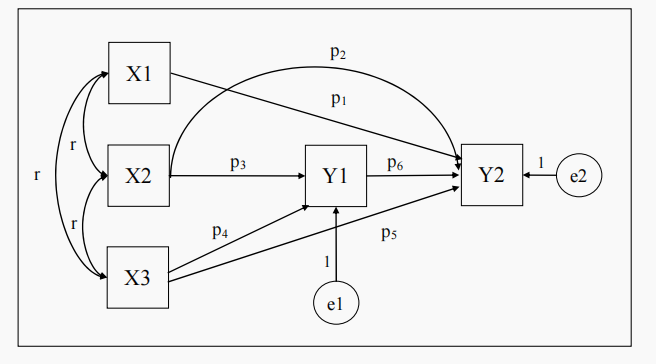

（1）上述模型中，X1,X2和X3是预测变量，Y1、Y2是两个被预测变量，定义了6条路径（P1, P2, P3, P4, P5 和 P6）

（2）其中有5条我们称之为直接效应（directed effect）：

X1 —> Y2

X2 —> Y2

X2 —> Y1

X3 —> Y1

X3 —> Y2

##### 意味着一方对另一方有直接的影响

（3）其中有2条间接效应，

X2 —> Y1 —> Y2

X3 —> Y1 —> Y2

##### 意味着一方通过第三者变量影响最终变量，故也称之为中介效应

（4）最后， Y1 和 Y2 被若干路径来源解释，除了这些路径之外，
剩余未被解释的即为残差e1，e2



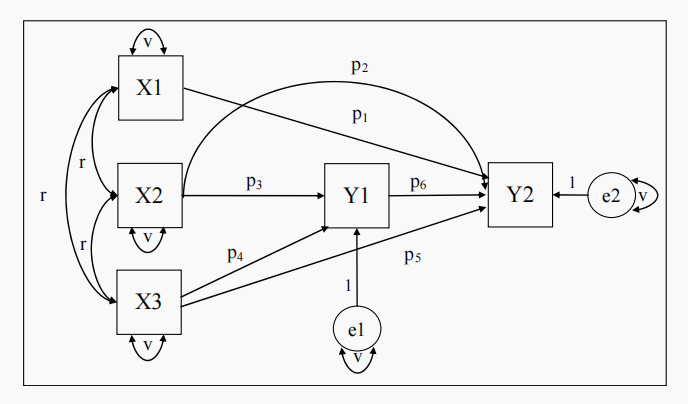



## 第二步，在lavaan中将上述模型图表达出来
上述模型，我们可以转化成等式：
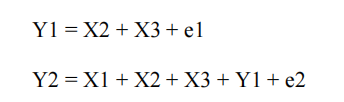

#### 以lavaan的形式把上述不等式写出来，保存为字符串的形式备用。

In [ ]:
model.SPE <- 'Y1 ~ X2 + X3 
              Y2 ~ X1 + X2 + X3 + Y1'

#### 问，变量间的covariance，变量的variance去哪里了？
lavaan默认：外源变量有covariance，所有外源显变量计算variance，所有内生显变量自动生成残差的潜变量，固定效应为1。


#### 如果假设某两个外源变量之间没有相关性怎么办？假设X1和X2没有关联

In [ ]:
model.SPE <- 'Y1 ~ X2 + X3
            Y2 ~ X1 + X2 + X3 + Y1
            X1 ~~ 0* X3'

#### 上述模型包含Y1到Y2的路径，我们需要区分直接效应（direct effect）和间接效应（indirect effect）

当一个变量直接预测两一个变量，我们称之为直接效应；

当一个变量预测两一个变量，同时这个变量还预测第三个变量，第一个通过第二个对第三个的预测效应称之为间接效应。


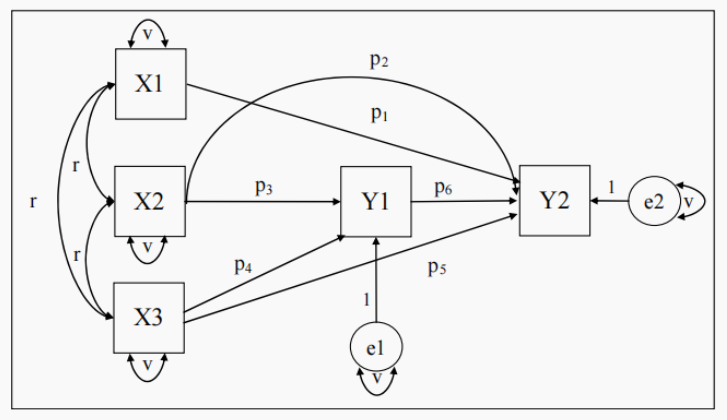

定义lavaan如下：

In [ ]:
model.SPE <- 'Y1 ~ p3*X2 + p4*X3 
             Y2 ~ p1*X1 + p2*X2 + p5*X3 + p6*Y1 

            # 定义间接效应

            p3p6:= p3*p6 
            p4p6:= p4*p6 

            # 定义总效应
            total:= p1 + p2 + p5 + p6 + (p3*p6) + (p4*p6)'


#### 使用 boostrap 判断间接效应的显著性 和 置信区间

最常用的方法是使用 booststrap 法， boostrap 既不要求数据正态，又不要求大样本量。该方法从现有样本中随机生成新的样本，每一个样本放入模型，取参数均值作为估计参数，并提供置信区间。

## 第三步，模型估计：
se = "bootstrap" 设置使用bootstrap法

bootstrap = 1000 设置随机取样1000次

In [ ]:
model.EST <- sem (model.SPE, data = BASE, se = "bootstrap", bootstrap =1000)

## 第四步，提取模型结果：
fit.measure = T  提供模型拟合指数

standardized = T 提供标准化参数（效应量）

modification = T 提供模型修正指标

 rsq = T  所有内生变量提供R方

In [ ]:
summary (model.EST,
         fit.measures = TRUE, 
         standardized = TRUE,
         modindices = TRUE, 
         rsq = TRUE)

## 举例

研究问题：老人的心理资源是否影响他们的自我刻板印象，进而影响他们的健康？

why：自我刻板印象使个体以或积极或消极的形式看待自己，这影响人的行为和认知，可能作用于健康。这个认知机制可能中介心理资源与健康之间的关系。

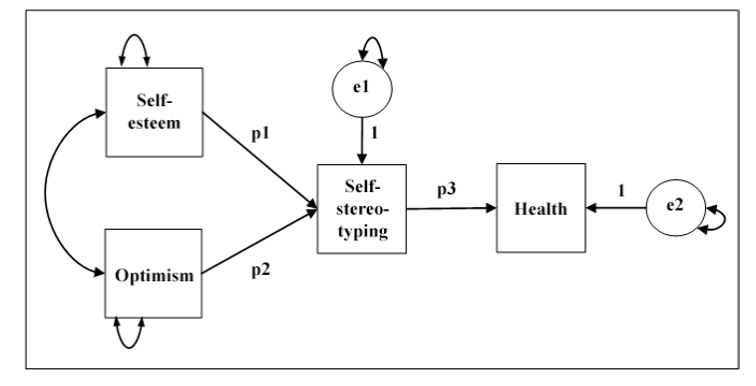



In [ ]:
library(lavaan)
#定义模型
model.SPE <- 'self_stereotyping ~ p1*self_esteem + p2*optimism 
              health ~ p3*self_stereotyping 

              # 定义间接效应 
              Indirect_all := p1*p2*p3
              Indirect_p1p3:= p1*p3
              Indirect_p2p3:= p2*p3
'

#模型拟合
model.EST <- sem (model.SPE, data = data3_5)

#提取结果
summary(model.EST, 
        fit.measures = TRUE, 
        standardized = TRUE, 
        modindices = TRUE, 
        rsq = TRUE)

### 模型拟合质量

CFI、TLI
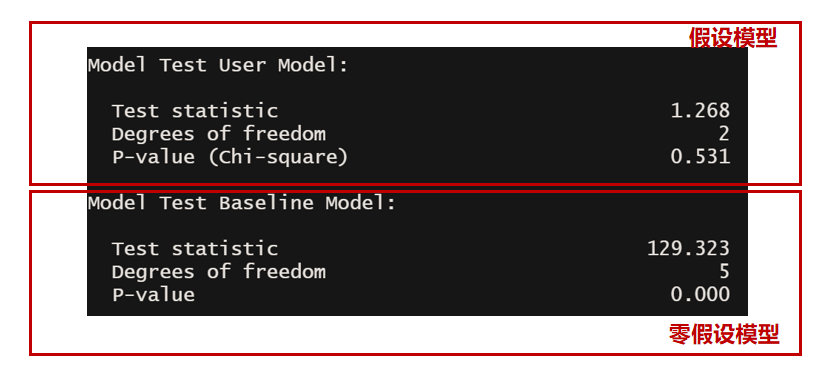

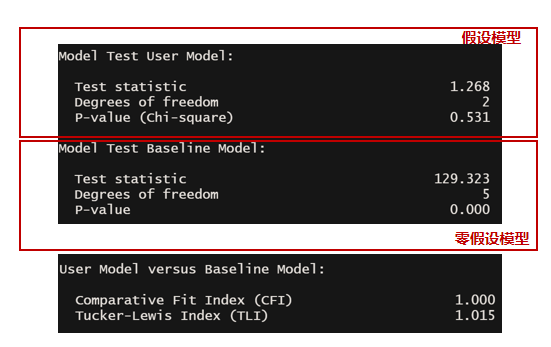

RMSEA
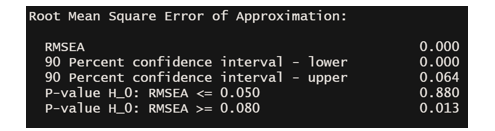

##### 以上指标，大家只要提供 卡方、卡方自由度、CFI、TLI 和 RMSEA 即可，至多再提供一下SRMR


### 模型预测效应 / 路径效应

模型中路径效应
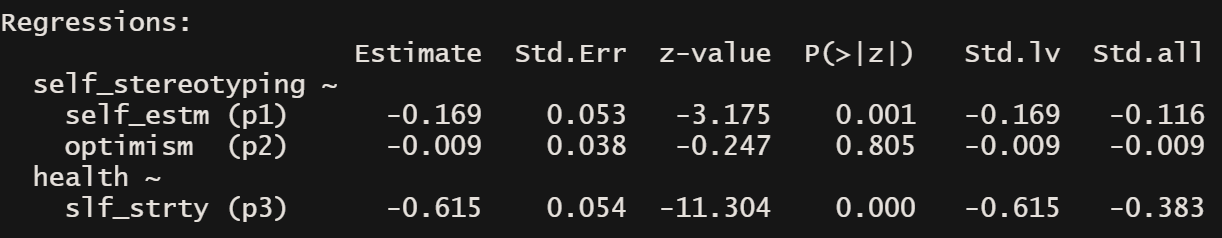

定义的路径效应（中介效应）
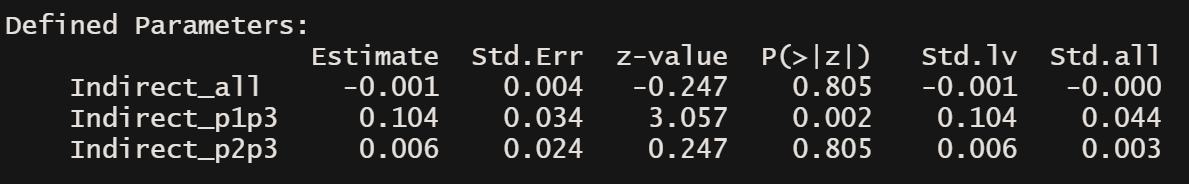

路径效应的 R square
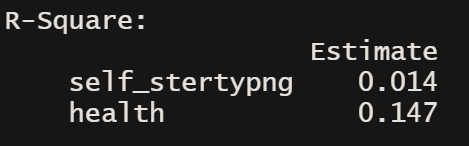

模型修正
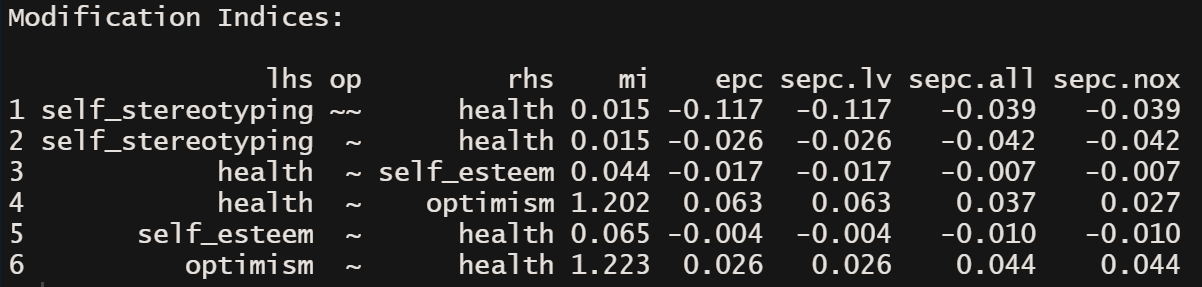

##### 以上模型结果整理到三线表中的样式

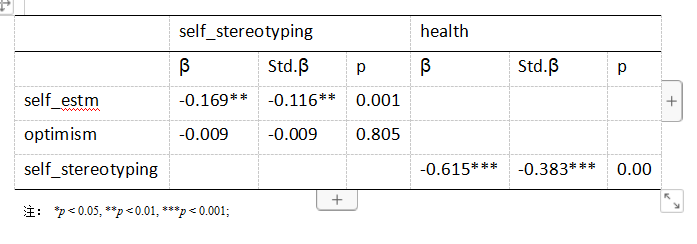